In [1]:
import pandas as pd
import seaborn as sns 

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.shape 

(891, 12)

In [4]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.loc[df['Embarked'] == 'Não Listada']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
df.groupby('Pclass')['Age'].agg(['mean','median', 'sum']).round(2)

,mean,median,sum
Pclass,,,
1,38.23,37.0,7111.42
2,29.88,29.0,5168.83
3,25.14,24.0,8924.92


In [9]:
df.drop(['Name'], axis='columns', inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
Q1 = df['Age'].quantile(0.25)
Q2 = df['Age'].quantile(0.50)
Q3 = df['Age'].quantile(0.75)
IQ = Q3 - Q1
IA = [Q1 - (1.5 * IQ), Q3 + (1.5*IQ)]

IA, IQ

gb = round(((Q3 - Q2) - (Q2 - Q1)) / IQ, 2)

In [31]:
df.loc[df['Age'] < 1]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,male,0.83,1,1,29106,18.7500,NaN,S


In [35]:
df.loc[(df['Age'] >= 65)  &(df['Age'] <= 80)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,male,70.0,1,1,WE/P 5735,71.0000,B22,S


<Axes: xlabel='Age', ylabel='Sex'>

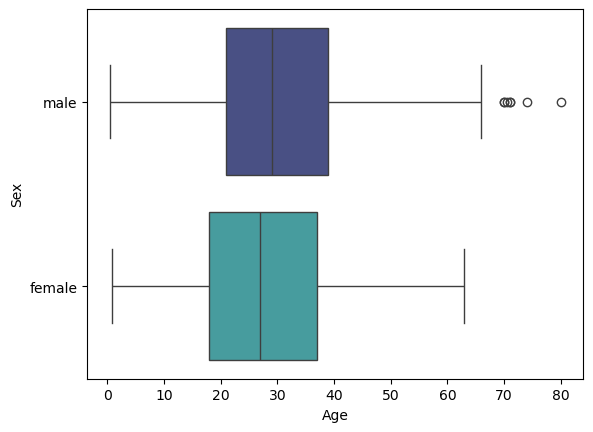

In [21]:
sns.boxplot(df, x='Age', y='Sex', hue='Sex', palette='mako')

<Axes: xlabel='Age'>

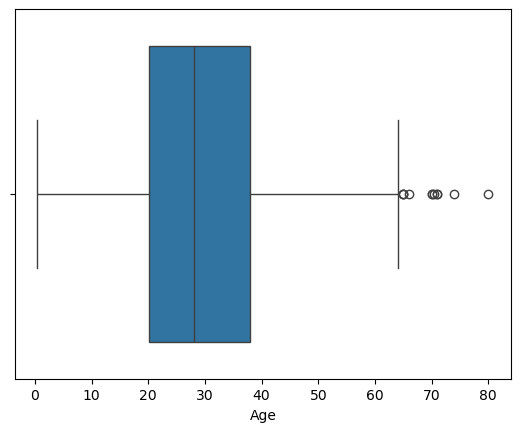

In [22]:
sns.boxplot(df, x='Age')

<Axes: xlabel='Age', ylabel='Density'>

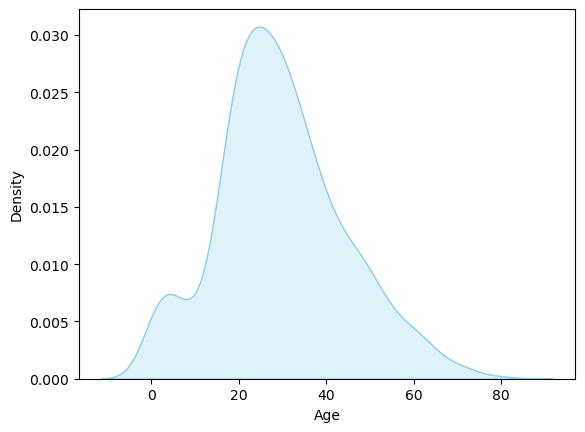

In [37]:
sns.kdeplot(df['Age'].dropna(), fill=True, color="skyblue")

In [18]:
df.groupby('Pclass')[['PassengerId', 'Age']].agg(['mean', 'std', 'max', 'min']).round(2)

PassengerId                     Age                  
              mean     std  max min   mean   std   max   min
Pclass                                                      
1           461.60  246.74  890   2  38.23  14.8  80.0  0.92
2           445.96  250.85  887  10  29.88  14.0  70.0  0.67
3           439.15  264.44  891   1  25.14  12.5  74.0  0.42

In [19]:
IA

[np.float64(-6.6875), np.float64(64.8125)]